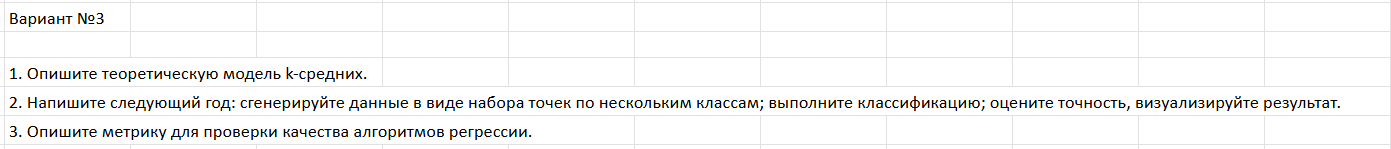

## Задание 1.

**K-средних (K-means)** — это итерационный алгоритм кластеризации, который разделяет набор данных на $k$ непересекающихся кластеров. Каждый кластер описывается центроидом (средним значением точек в кластере). Основная идея — минимизировать внутрикластерную дисперсию.

### 1.2 Математическая постановка задачи

Пусть имеется набор данных $X = \\{x_1, x_2, ..., x_n\\}$, где $x_i \in \mathbb{R}^d$. Необходимо разбить $X$ на $k$ кластеров $C = \\{C_1, C_2, ..., C_k\\}$ так, чтобы минимизировать целевую функцию:

$$J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2$$

где $\mu_i$ — центроид кластера $C_i$, вычисляемый как:

$$\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$$

### 1.3 Алгоритм K-средних

#### Шаг 1
Выбрать начальные центроиды $\mu_1^{(1)}, \mu_2^{(1)}, ..., \mu_k^{(1)}$. Это можно сделать:
- Случайным выбором $k$ точек из набора данных
- Используя алгоритм K-means++
- Случайной генерацией в пределах диапазона данных

#### Шаг 2
Для каждой точки $x_j$ найти ближайший центроид:

$$c_j^{(t)} = \arg\min_{i} \|x_j - \mu_i^{(t)}\|^2$$

где $c_j^{(t)}$ — индекс кластера для точки $x_j$ на итерации $t$.

#### Шаг 3
Пересчитать центроиды как среднее точек в каждом кластере:

$$\mu_i^{(t+1)} = \frac{1}{|C_i^{(t)}|} \sum_{x_j \in C_i^{(t)}} x_j$$

#### Шаг 4
Повторять шаги 2-3, пока:
- Центроиды перестанут значительно изменяться: $\|\mu_i^{(t+1)} - \mu_i^{(t)}\| < \epsilon$
- Достигнуто максимальное число итераций
- Изменение целевой функции $J$ становится меньше порога

### 1.4 Свойства и ограничения

**Преимущества:**
- Простота реализации и интерпретации
- Линейная сложность
- Эффективен для больших наборов данных

**Ограничения:**
- Требует задания числа кластеров $k$ заранее
- Чувствительность к начальным центроидам
- Сходится к локальному минимуму
- Предполагает сферическую форму кластеров
- Чувствительность к выбросам

## Задание 2.

Количество кластеров: 3
Silhouette Score: 0.878

Центроиды кластеров:
  Кластер 0: [-0.20998194  1.16447374]
  Кластер 1: [-1.09011796 -1.26212427]
  Кластер 2: [1.30009991 0.09765053]


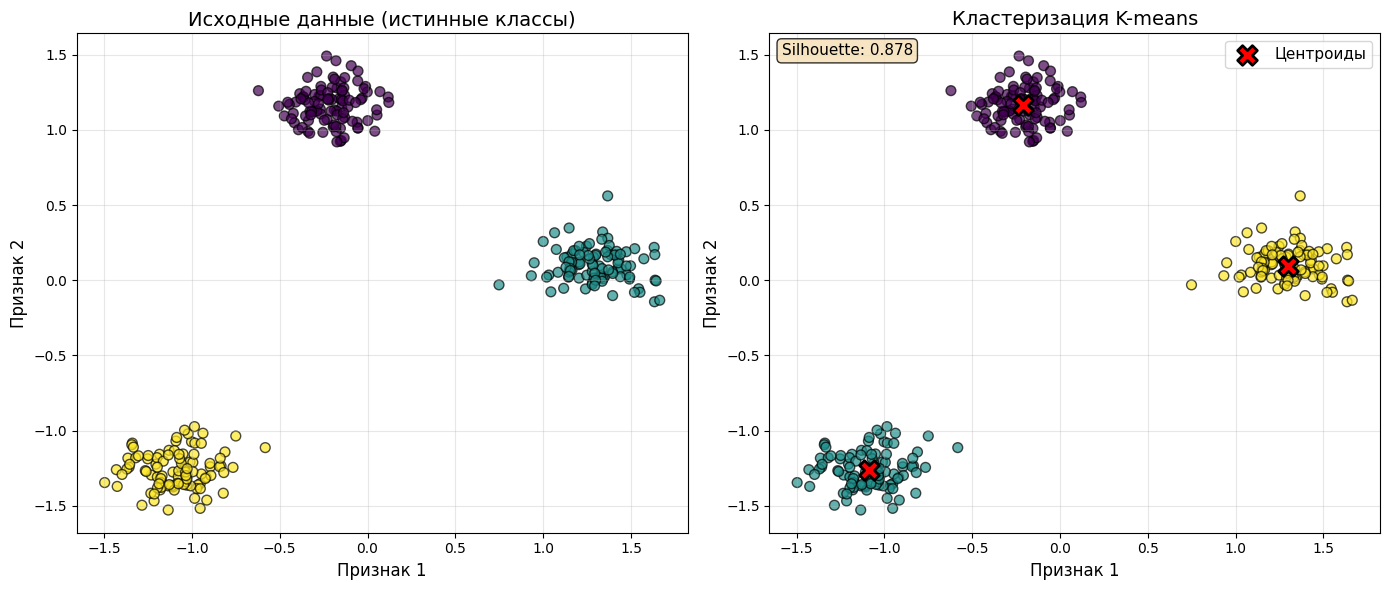

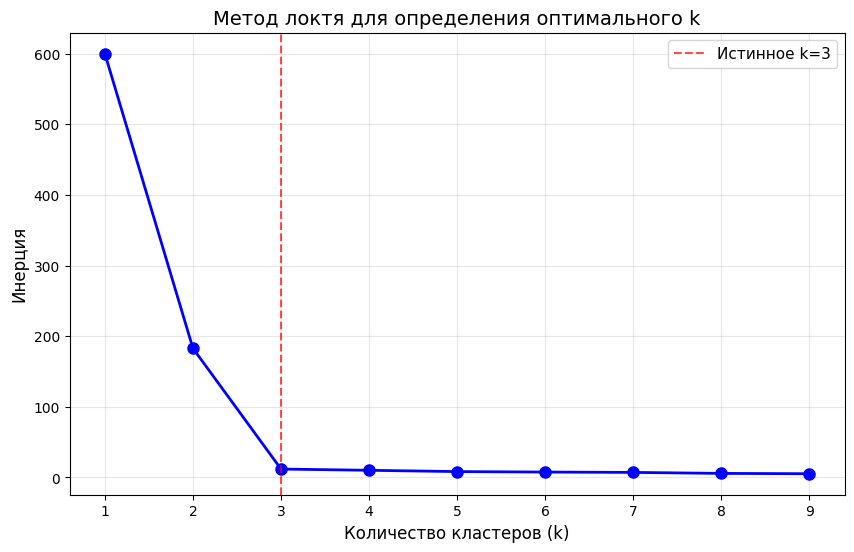

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n_samples = 300
n_features = 2
n_classes = 3

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=0.8, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Классификация с помощью K-means
kmeans = KMeans(n_clusters=n_classes, init='k-means++', n_init=10, max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Оценка точности
# Для кластеризации используем метрики без истинных меток и с ними
silhouette = silhouette_score(X, y_pred)

print(f"Количество кластеров: {n_classes}")
print(f"Silhouette Score: {silhouette:.3f}")
print("\nЦентроиды кластеров:")
for i, centroid in enumerate(centroids):
    print(f"  Кластер {i}: {centroid}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', 
                          s=50, alpha=0.7, edgecolors='k')
axes[0].set_title('Исходные данные (истинные классы)', fontsize=14)
axes[0].set_xlabel('Признак 1', fontsize=12)
axes[0].set_ylabel('Признак 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', 
                          s=50, alpha=0.7, edgecolors='k')

axes[1].scatter(centroids[:, 0], centroids[:, 1], c='red', 
               marker='X', s=200, label='Центроиды', edgecolors='k', linewidth=2)
axes[1].set_title('Кластеризация K-means', fontsize=14)
axes[1].set_xlabel('Признак 1', fontsize=12)
axes[1].set_ylabel('Признак 2', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

metrics_text = f'Silhouette: {silhouette:.3f}'
axes[1].text(0.02, 0.98, metrics_text, transform=axes[1].transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Метод локтя
k_range = range(1, 10)
inertias = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X)
    inertias.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (k)', fontsize=12)
plt.ylabel('Инерция', fontsize=12)
plt.title('Метод локтя для определения оптимального k', fontsize=14)
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.axvline(x=n_classes, color='r', linestyle='--', alpha=0.7, 
           label=f'Истинное k={n_classes}')
plt.legend(fontsize=11)
plt.show()

# Задание 3.

## 1. Общие принципы оценки моделей регрессии

При оценке качества регрессионных моделей используются метрики, которые измеряют разницу между предсказанными значениями ($\hat{y}_i$) и фактическими значениями ($y_i$). Выбор метрики зависит от:

- **Цели исследования**: бизнес-задачи, научные исследования
- **Характера данных**: наличие выбросов, масштаб значений
- **Требований к интерпретируемости**: нужны ли абсолютные значения или относительные
- **Свойств ошибок**: нормальность распределения, гомоскедастичность

## 2. Основные метрики регрессии

### 2.1 Среднеквадратичная ошибка (Mean Squared Error, MSE)

**Определение:**
Среднее значение квадратов разностей между предсказанными и фактическими значениями.

**Формула:**
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**Свойства:**
- Диапазон значений: [0, +∞)
- Единицы измерения: квадрат единиц целевой переменной
- Чувствительность к выбросам: высокая (квадратичный штраф)
- Интерпретируемость: низкая из-за квадратичной природы

**Применение:**
- Когда большие ошибки критически важны
- В алгоритмах, основанных на градиентном спуске
- При нормальном распределении ошибок

**Преимущества:**
- Дифференцируема во всех точках
- Удобна для математических вычислений
- Штрафует большие ошибки экспоненциально

**Недостатки:**
- Не сохраняет единицы измерения
- Чрезмерно чувствительна к выбросам
- Может давать завышенные оценки ошибки

### 2.2 Среднеквадратичное отклонение (Root Mean Squared Error, RMSE)

**Определение:**
Корень квадратный из среднеквадратичной ошибки.

**Формула:**
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

**Свойства:**
- Диапазон значений: [0, +∞)
- Единицы измерения: те же, что у целевой переменной
- Чувствительность к выбросам: высокая
- Интерпретируемость: хорошая

**Применение:**
- Когда важна интерпретация в исходных единицах
- Для сравнения моделей на разных наборах данных
- В задачах прогнозирования с критичными отклонениями

**Преимущества:**
- Сохраняет единицы измерения
- Легче интерпретировать, чем MSE
- Сохраняет свойство штрафования больших ошибок

**Недостатки:**
- Не дифференцируема в нуле
- Чувствительна к выбросам
- Не является робастной метрикой

### 2.3 Средняя абсолютная ошибка (Mean Absolute Error, MAE)

**Определение:**
Среднее значение абсолютных разностей между предсказанными и фактическими значениями.

**Формула:**
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**Свойства:**
- Диапазон значений: [0, +∞)
- Единицы измерения: те же, что у целевой переменной
- Чувствительность к выбросам: средняя (линейный штраф)
- Интерпретируемость: отличная

**Применение:**
- При наличии выбросов в данных
- Когда все ошибки одинаково важны
- Для простой интерпретации результатов

**Преимущества:**
- Простая интерпретация (средняя ошибка в единицах измерения)
- Менее чувствительна к выбросам, чем MSE/RMSE
- Легко вычисляется

**Недостатки:**
- Не дифференцируема в нуле
- Меньше штрафует за большие ошибки
- Не всегда оптимальна для градиентных методов

### 2.4 Коэффициент детерминации (R-квадрат, R²)

**Определение:**
Доля дисперсии зависимой переменной, объясненная моделью.

**Формула:**
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$
где $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ - среднее значение целевой переменной.

**Свойства:**
- Диапазон значений: (-∞, 1]
- Единицы измерения: безразмерная величина
- Чувствительность к выбросам: зависит от распределения
- Интерпретируемость: хорошая

**Интерпретация значений:**
- **R² = 1**: Идеальная модель (все точки лежат на линии)
- **R² = 0**: Модель не лучше, чем простое среднее
- **R² < 0**: Модель работает хуже, чем простое среднее
- **0.7 < R² < 0.9**: Хорошее качество модели
- **R² > 0.9**: Отличное качество модели

**Применение:**
- Для сравнения моделей на разных данных
- При оценке объяснительной способности модели
- Как обобщенная метрика качества

**Преимущества:**
- Нормированная метрика (легко сравнивать разные модели)
- Имеет четкую статистическую интерпретацию
- Показывает долю объясненной дисперсии

**Недостатки:**
- Увеличивается с добавлением новых переменных
- Может быть обманчивым при нелинейных зависимостях
- Чувствителен к выбросам